In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
import seaborn as sb
import json
from matplotlib import colors

sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(6, 4))
sc.settings.verbosity = 3

np.random.seed(2211)

#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.5.1 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


Load final preprocessed data from *exp_04/all_genes* or *exp_04/variable_genes* and do analysis for marker genes

In [2]:
dataset = 'E13_hom'
adata = sc.read('../ann_data/exp_04/' + dataset + '_norm_variable_genes.h5ad')
adata

AnnData object with n_obs × n_vars = 6222 × 1722
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'size_factors', 'S_score', 'G2M_score', 'phase', 'leiden', 'neural_progen_marker_expr', 'intermediate_progen_marker_expr', 'post_mitotic_marker_expr', 'ectopic_marker_expr'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
marker_genes = dict()
marker_genes['neural_progen'] = ['Pax6', 'Vim', 'Sox2']
# marker_genes['neural_progen'] = ['Pax6', 'Sox2']
marker_genes['intermediate_progen'] = ['Eomes', 'Btg2']
marker_genes['post_mitotic'] = ['Tbr1', 'Sox5']
marker_genes['ectopic'] = ['Gsx2', 'Prdm13', 'Dlx1', 'Dlx2', 'Dlx5', 'Gad1',
                           'Gad2', 'Ptf1a', 'Msx3', 'Helt', 'Olig3']

var_names = set(adata.var_names)
columns = set(adata.obs.columns)
gene_names = var_names.union(columns)
available_ectopic = gene_names.intersection(marker_genes['ectopic']) 

computing neighbors
    using 'X_pca' with n_pcs = 40


/home/pts/dissertation_single_cell/.env/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10006. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


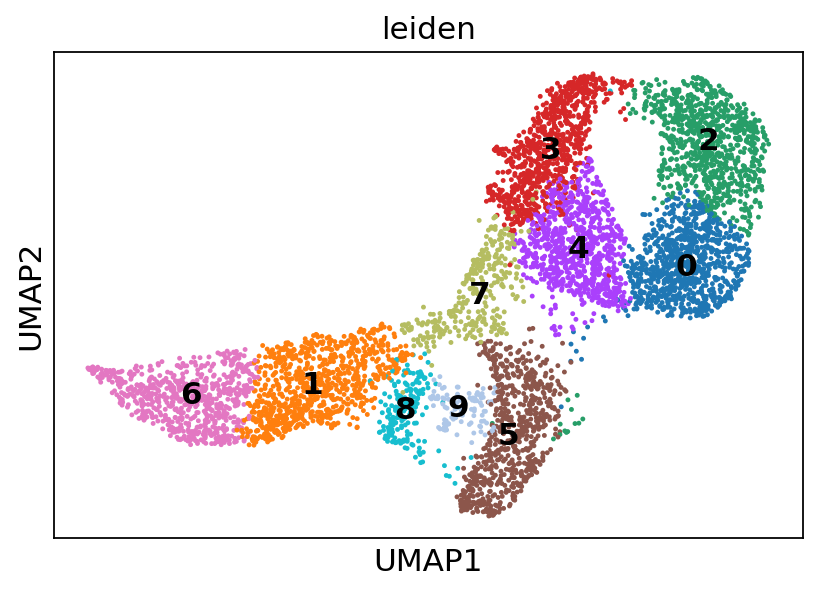

In [4]:
sc.pp.neighbors(adata, n_neighbors=70, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.umap(adata, min_dist=0.3)
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')

## Calculate marker genes for the leiden clusters

To annotate the clusters we obtained, we find genes that are up-regulated in the cluster compared to all other clusters (marker genes). This differential expression test is performed by a Welch t-test with overestimated variance to be conservative. This is the default in scanpy. The test is automatically performed on the .raw data set, which is uncorrected and contains all genes. All genes are taken into account, as any gene may be an informative marker.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


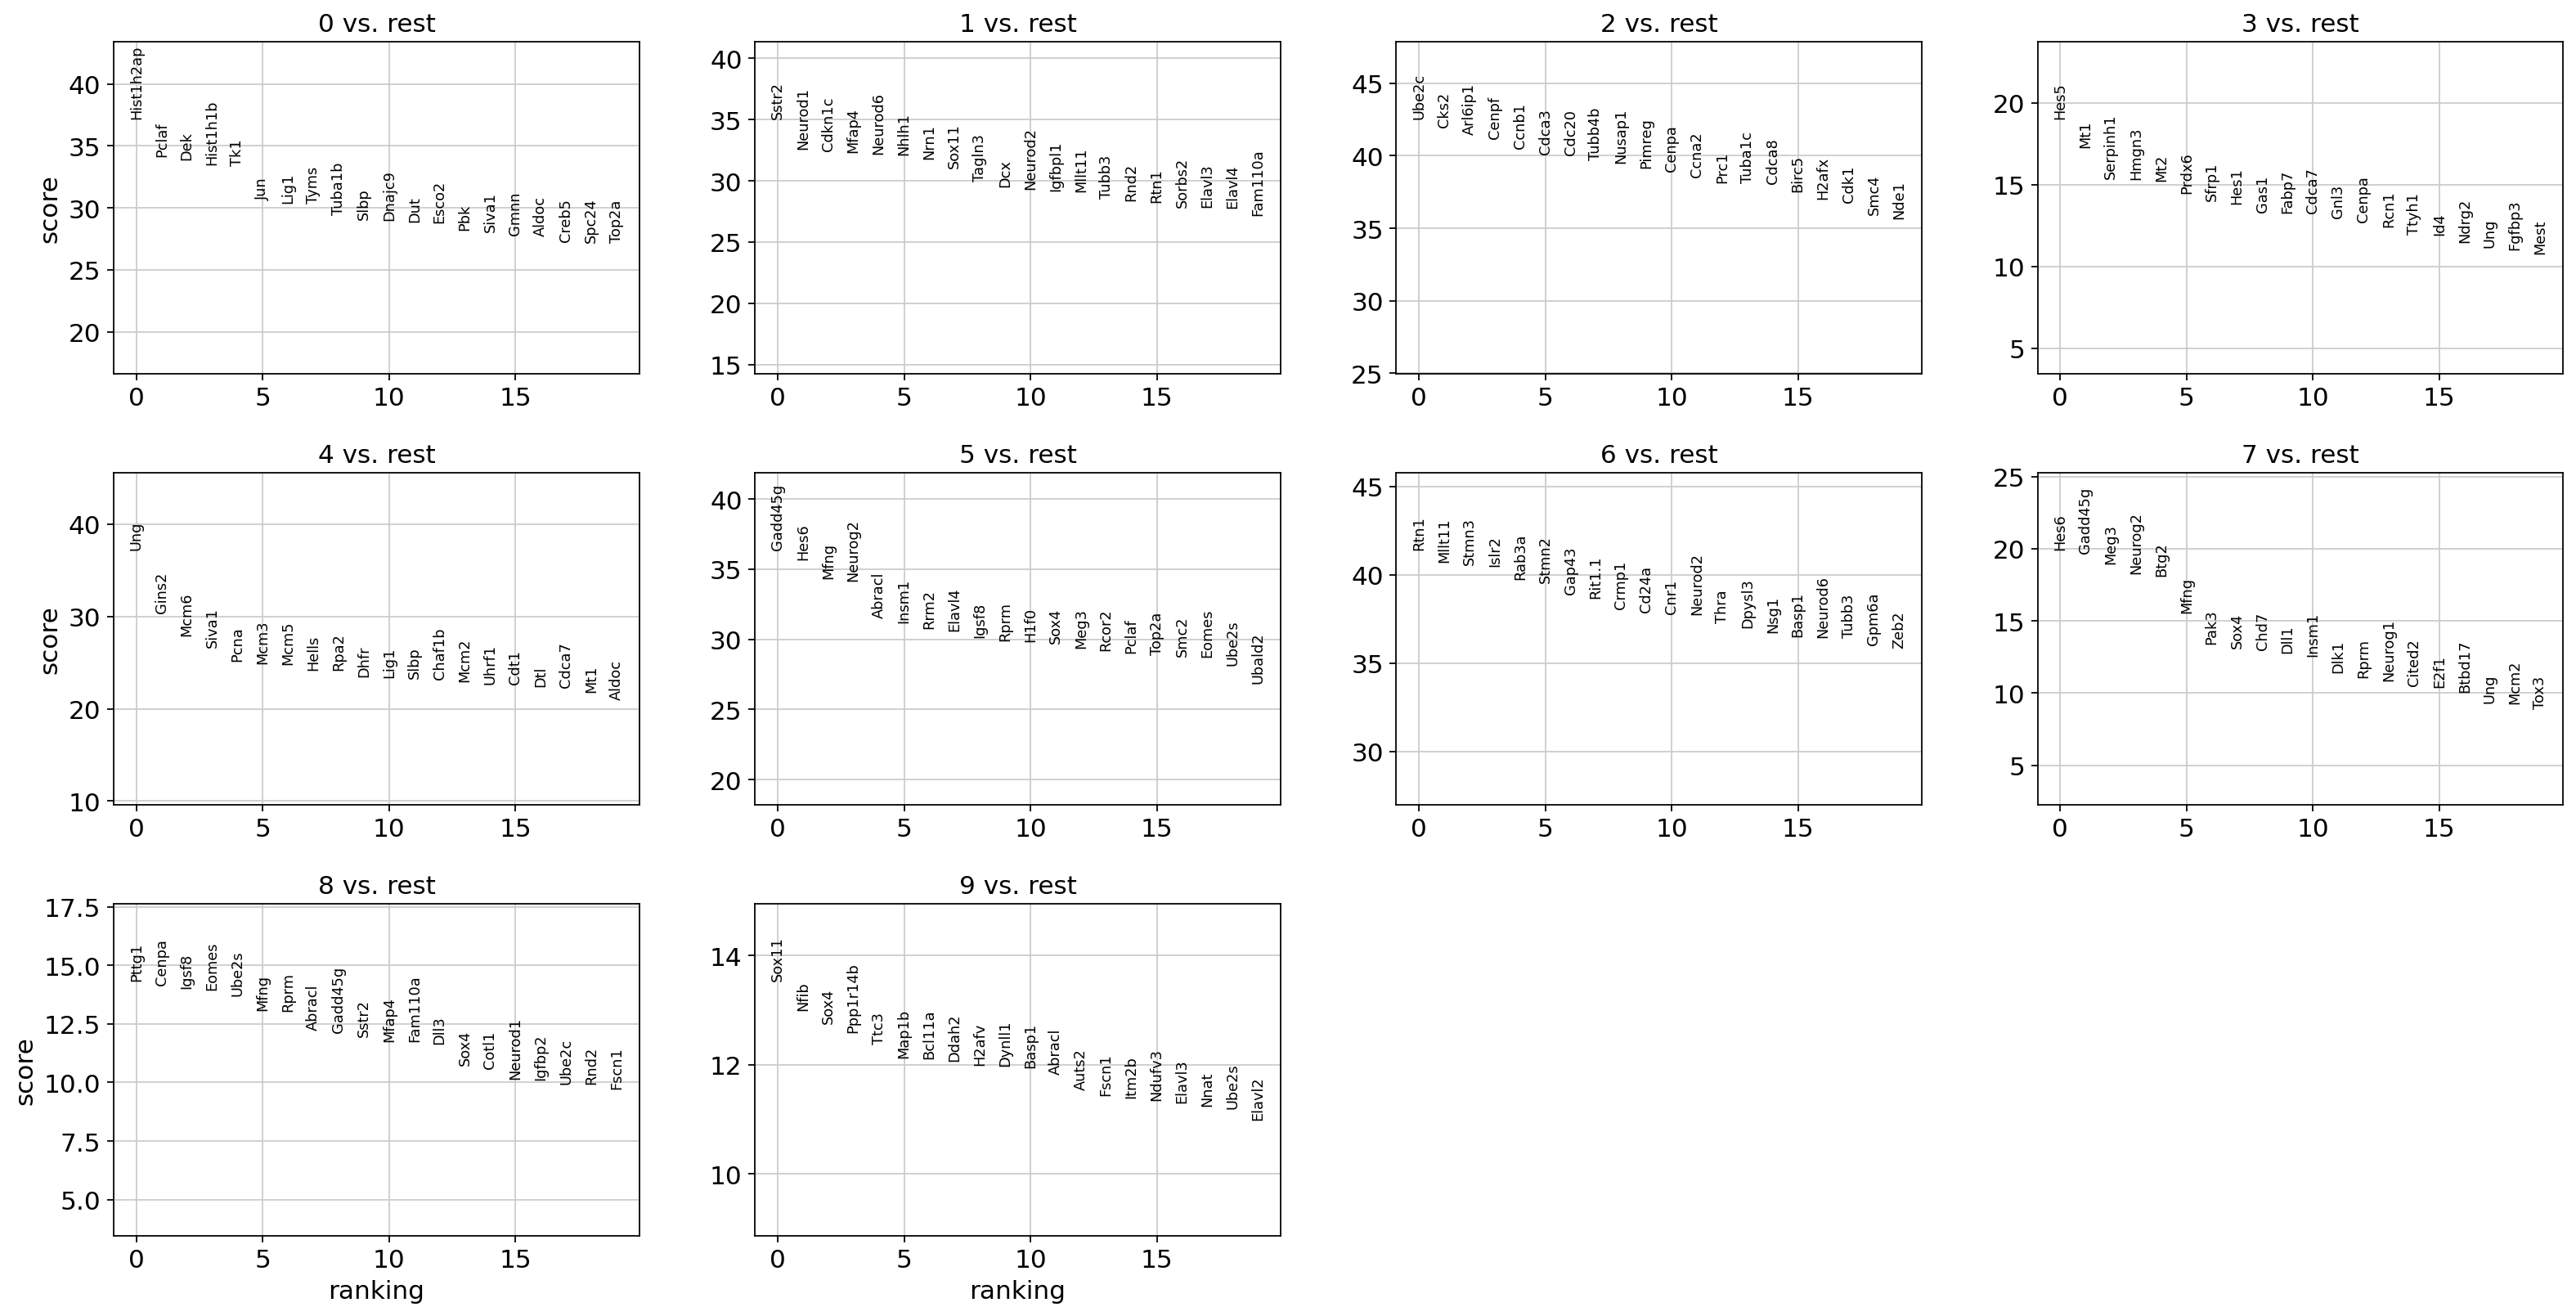

0        1        2         3      4        5       6        7  \
0  Hist1h2ap    Sstr2    Ube2c      Hes5    Ung  Gadd45g    Rtn1     Hes6   
1      Pclaf  Neurod1     Cks2       Mt1  Gins2     Hes6  Mllt11  Gadd45g   
2        Dek   Cdkn1c  Arl6ip1  Serpinh1   Mcm6     Mfng   Stmn3     Meg3   
3   Hist1h1b    Mfap4    Cenpf     Hmgn3  Siva1  Neurog2   Islr2  Neurog2   
4        Tk1  Neurod6    Ccnb1       Mt2   Pcna   Abracl   Rab3a     Btg2   
5        Jun    Nhlh1    Cdca3     Prdx6   Mcm3    Insm1   Stmn2     Mfng   
6       Lig1     Nrn1    Cdc20     Sfrp1   Mcm5     Rrm2   Gap43     Pak3   
7       Tyms    Sox11   Tubb4b      Hes1  Hells   Elavl4  Rit1.1     Sox4   
8     Tuba1b   Tagln3   Nusap1      Gas1   Rpa2    Igsf8   Crmp1     Chd7   
9       Slbp      Dcx   Pimreg     Fabp7   Dhfr     Rprm   Cd24a     Dll1   

         8         9  
0    Pttg1     Sox11  
1    Cenpa      Nfib  
2    Igsf8      Sox4  
3    Eomes  Ppp1r14b  
4    Ube2s      Ttc3  
5     Mfng     Map1b  
6     Rprm    Bcl11a  
7   Abracl     Ddah2  
8  Gadd45g     H2afv  
9    Sstr2    Dynll1

In [5]:
# Calculate marker genes
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=True)  # 100 genes by default
# sc.tl.rank_genes_groups(adata, 'leiden', method='t-test_overestim_var', use_raw=True)  # 100 genes by default
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, use_raw=True)

top_ranked_genes_per_cluster = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)
top_ranked_genes_per_cluster

In [6]:
ranked_genes = adata.uns['rank_genes_groups']

# Loop through gene names and scores (ordered)
for gene_list, score_list in zip(ranked_genes['names'][:1], ranked_genes['scores'][:1]):
    for gene, score in zip(gene_list, score_list):
        print(gene, score)

Hist1h2ap 37.205635
Sstr2 35.091072
Ube2c 42.569942
Hes5 19.051758
Ung 37.267925
Gadd45g 36.4041
Rtn1 41.42894
Hes6 19.951609
Pttg1 14.353571
Sox11 13.540389


Heatmap showing the top 5 differentiably expressed genes for each cluster. Assuming that cluster 1 is ectopic, we notice that the top 5 genes for cluster 1 are also upregulated in clusters 5, 8 and a bit less in 3. This can also be seen from the dendrogram below.

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


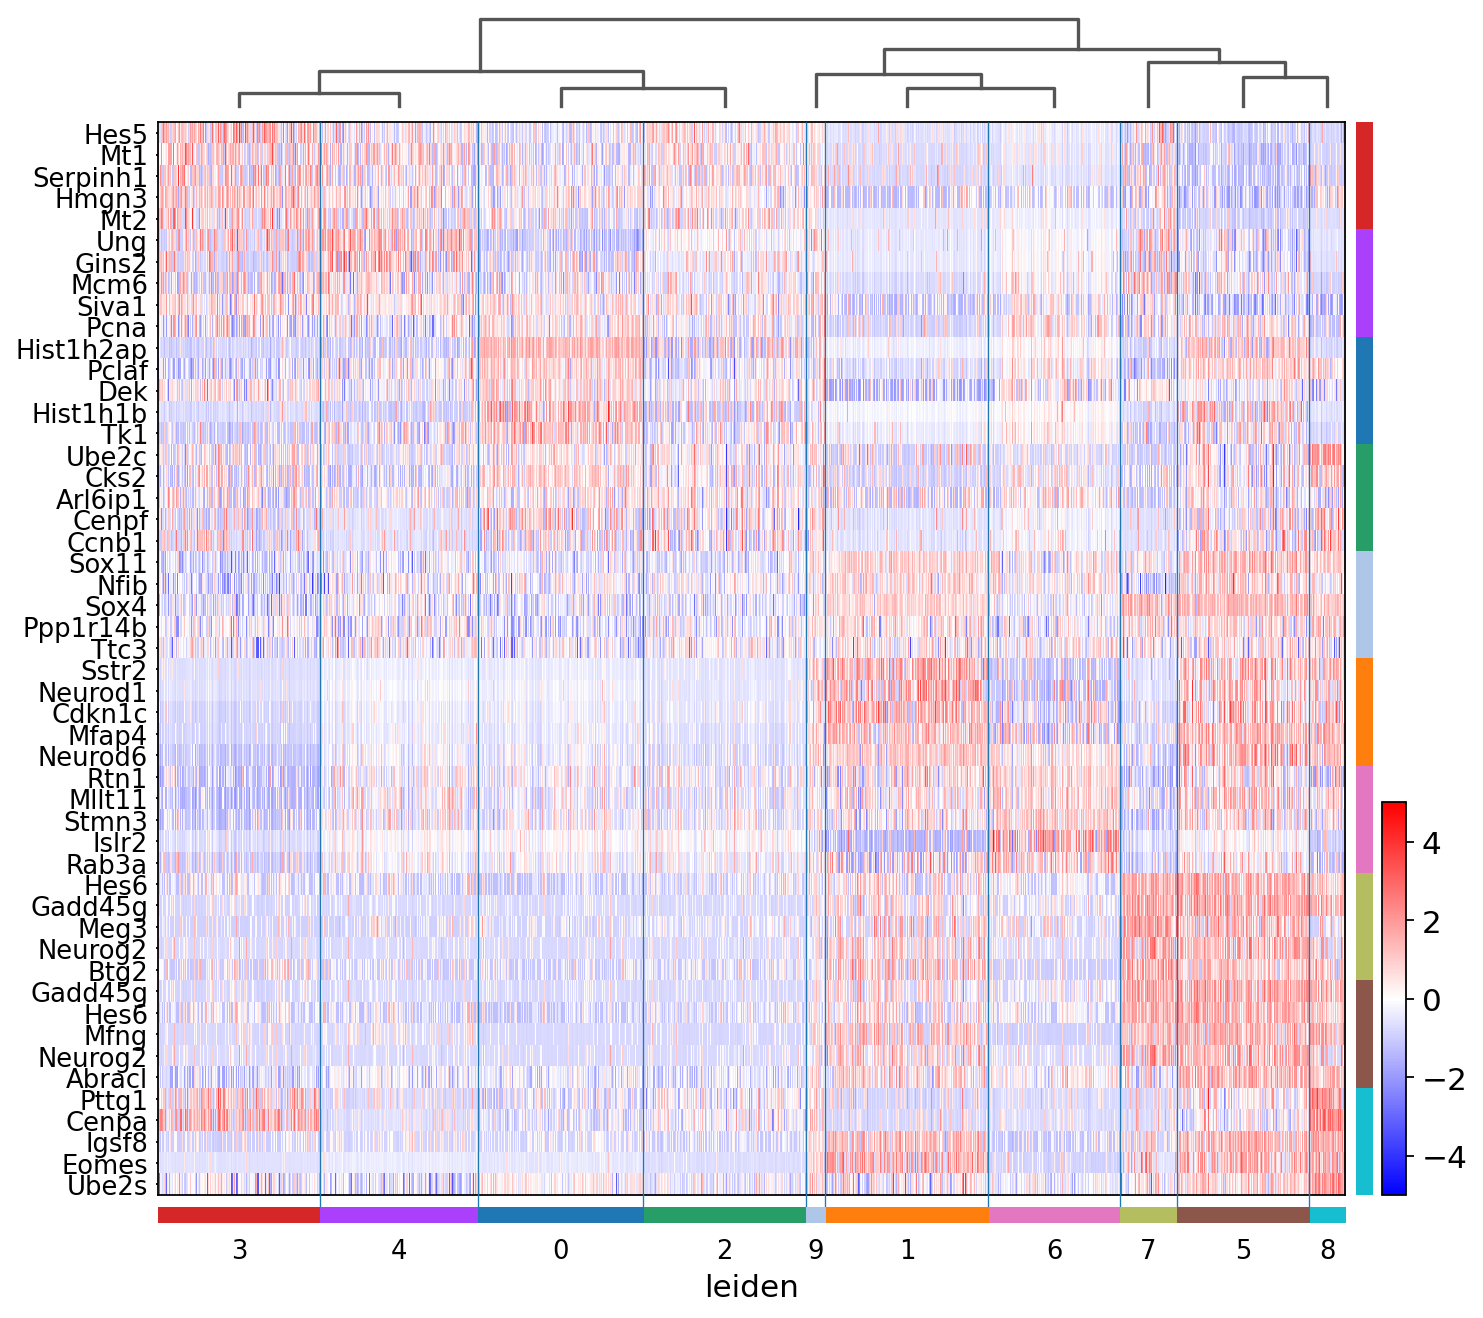

In [7]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, use_raw=False, swap_axes=True,
                                vmin=-5, vmax=5, cmap='bwr', show_gene_labels=True)

Storing dendrogram info using `.uns['dendrogram_leiden']`


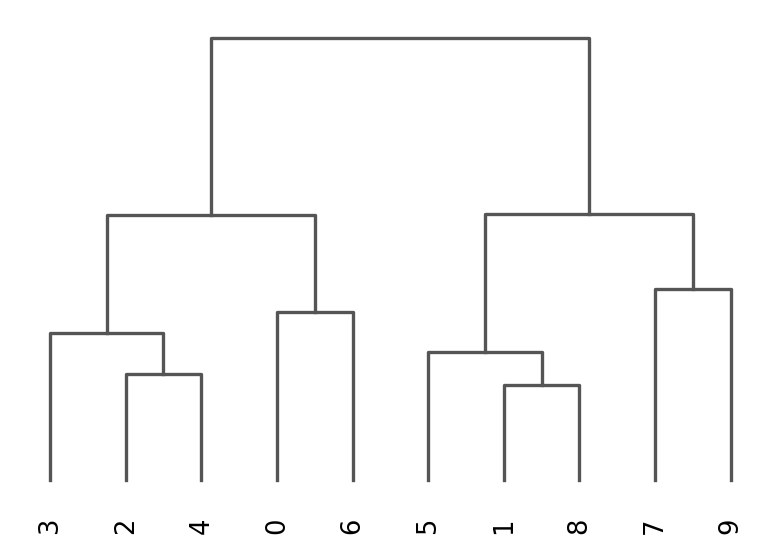

<AxesSubplot:>

In [8]:
sc.tl.dendrogram(adata, groupby='leiden', use_rep='X_umap', var_names=marker_genes, use_raw=False)
sc.pl.dendrogram(adata, groupby='leiden')

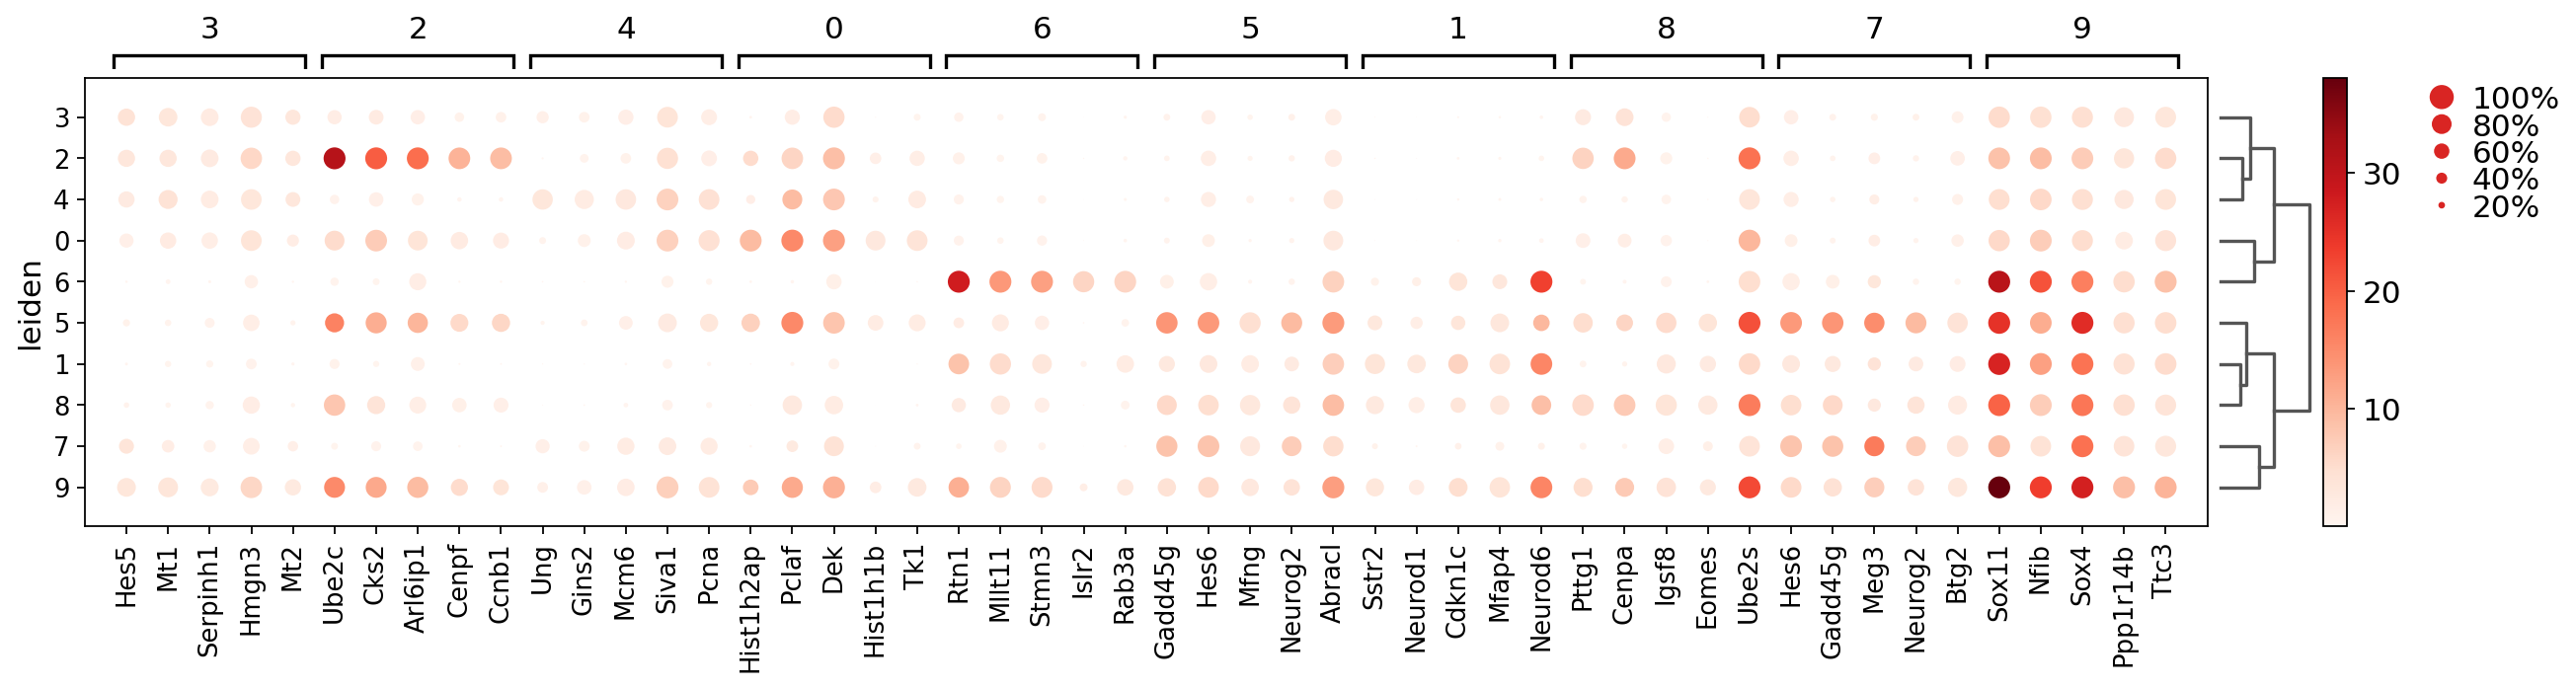

In [9]:
# Makes a dot plot of the expression values of var_names in each cluster
# color: mean expression of a gene within a cluster
# size: fraction of cells expressing the gene in the category
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)
#                                 values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7)

## Marker gene overlap

To further identify the clusters in our data set, we look at the overlap with a list of known marker genes. These were found by the bulk RNA-seq analysis that was previously performed on the same datasets.

marker_gene_overlap calculates an overlap score between data-deriven marker genes and provided markers

Marker gene overlap scores can be quoted as overlap counts, overlap coefficients, or jaccard indices. The method returns a pandas dataframe which can be used to annotate clusters based on marker gene overlaps.

The numbers in the table below denote the number of genes that are found in both sets, our marker genes and the 100 ranked genes. So, number 3 in (cluster 4, neural_progen) means that all 3 marker genes for neural progenitors (Pax6, Vim, Sox2) were found in the 100 ranked genes.

In [10]:
cell_annotation = sc.tl.marker_gene_overlap(adata, reference_markers=marker_genes, key='rank_genes_groups')
cell_annotation

0    1    2    3    4    5    6    7    8    9
neural_progen        2.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0  1.0
intermediate_progen  0.0  1.0  0.0  0.0  0.0  2.0  0.0  2.0  2.0  0.0
post_mitotic         0.0  1.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0
ectopic              0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0

We can also visualize the marker gene overlap as a fraction of the total marker genes, and then plot this as a heatmap for simpler cell identity annotation.

For each cluster, this method calculates the intersection of the ranked genes set with the set of the marker genes we have from bulk RNA-seq. If the intersection is an empty set, the value in the heatmap is 0 and so on. In cluster 9, there is no overlap of our marker genes with the ranked genes.

If normalize='reference', the counts at each cell are divided by the total number of our marker genes for each cell type.


<AxesSubplot:>

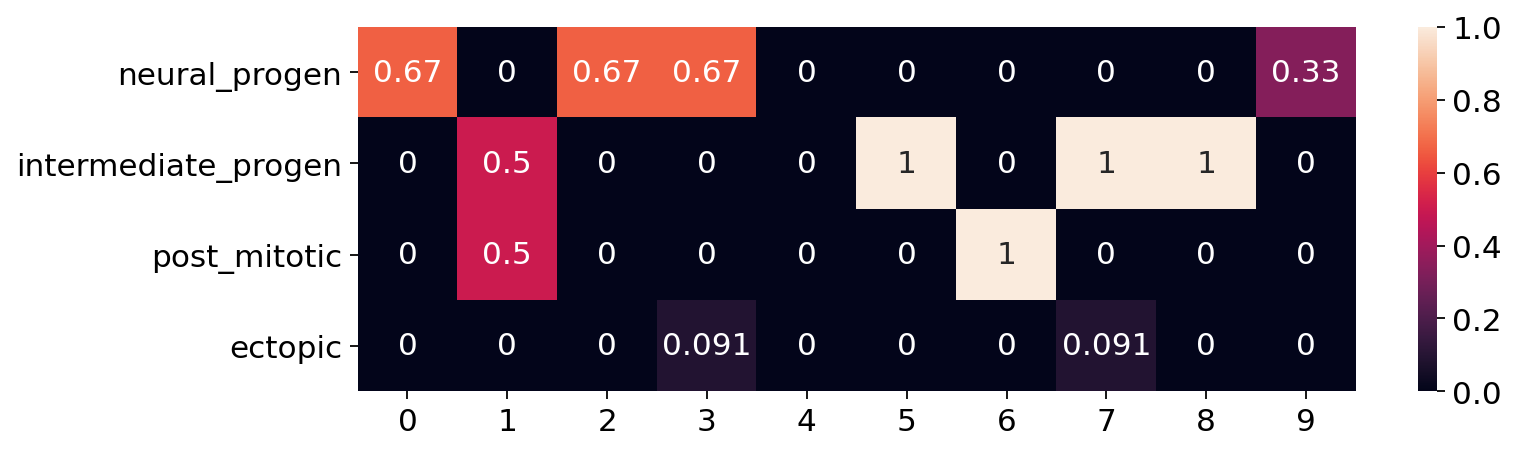

In [11]:
fig, ax = plt.subplots(figsize=(10,3))
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, reference_markers=marker_genes,
                                                 key='rank_genes_groups', normalize='reference')

sb.heatmap(cell_annotation_norm, cbar=True, annot=True)

## Combine cell types to 5 categories and annotate

Combine leiden clusters into the same cell types according to the heatmap above. We result in 5 different cell types:

1. **Neural progenitors**
2. **Intermediate progenitors**
3. **Post-mitotic neurons**
4. **Ectopic cells**
5. **Unknown**

In [12]:
def rename_clusters(leiden_clusters):
    cluster_annotations = dict()
    
    if dataset == 'E14_hom':
        cluster_annotations['Neural progenitors'] = ['4', '8', '10']
        cluster_annotations['Intermediate progenitors'] = ['0', '3']
        cluster_annotations['Post-mitotic neurons'] = ['2', '6', '7']
        cluster_annotations['Ectopic cells'] = ['1', '5']
        cluster_annotations['Unknown'] = ['9']
    else:
        cluster_annotations['Neural progenitors'] = ['0', '2', '9']
        cluster_annotations['Intermediate progenitors'] = ['5', '7', '8']
        cluster_annotations['Post-mitotic neurons'] = ['1', '6']
        cluster_annotations['Ectopic cells'] = ['3']
        cluster_annotations['Unknown'] = ['4']

#     These are for the E14_hom dataset that has all genes - not only highly variable genes
#     cluster_annotations['Neural progenitors'] = ['4', '10']
#     cluster_annotations['Intermediate progenitors'] = ['6']
#     cluster_annotations['Post-mitotic neurons'] = ['1', '2']
#     cluster_annotations['Ectopic cells'] = ['3', '7', '8']
#     cluster_annotations['Unknown'] = ['0', '5', '9']

    celltypes, clusters = zip(*cluster_annotations.items())
    new_cluster_names = list()

    for cl in adata.obs['leiden']:
        for celltype, cl_list in cluster_annotations.items():
            if cl in cl_list:
                new_cluster_names.append(celltype)
    return new_cluster_names   

... storing 'leiden_annotations' as categorical


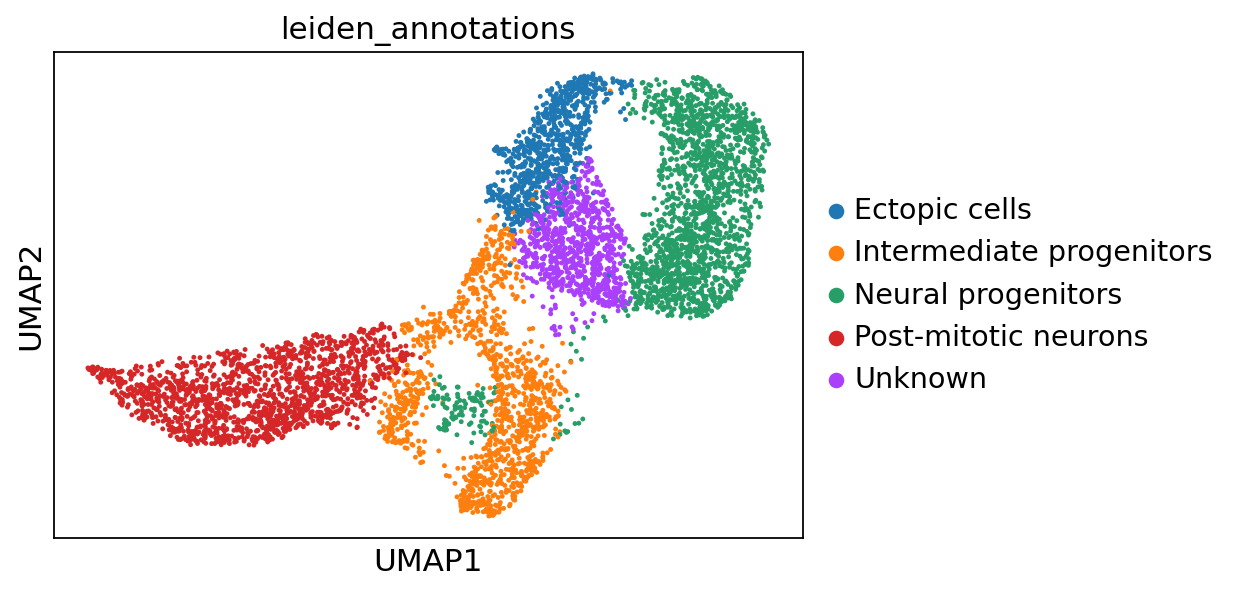

In [19]:
adata.obs['leiden_annotations'] = rename_clusters(adata.obs['leiden'])
sc.pl.umap(adata, color=['leiden_annotations'])

## Differential expression to find marker genes for the updated clusters

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


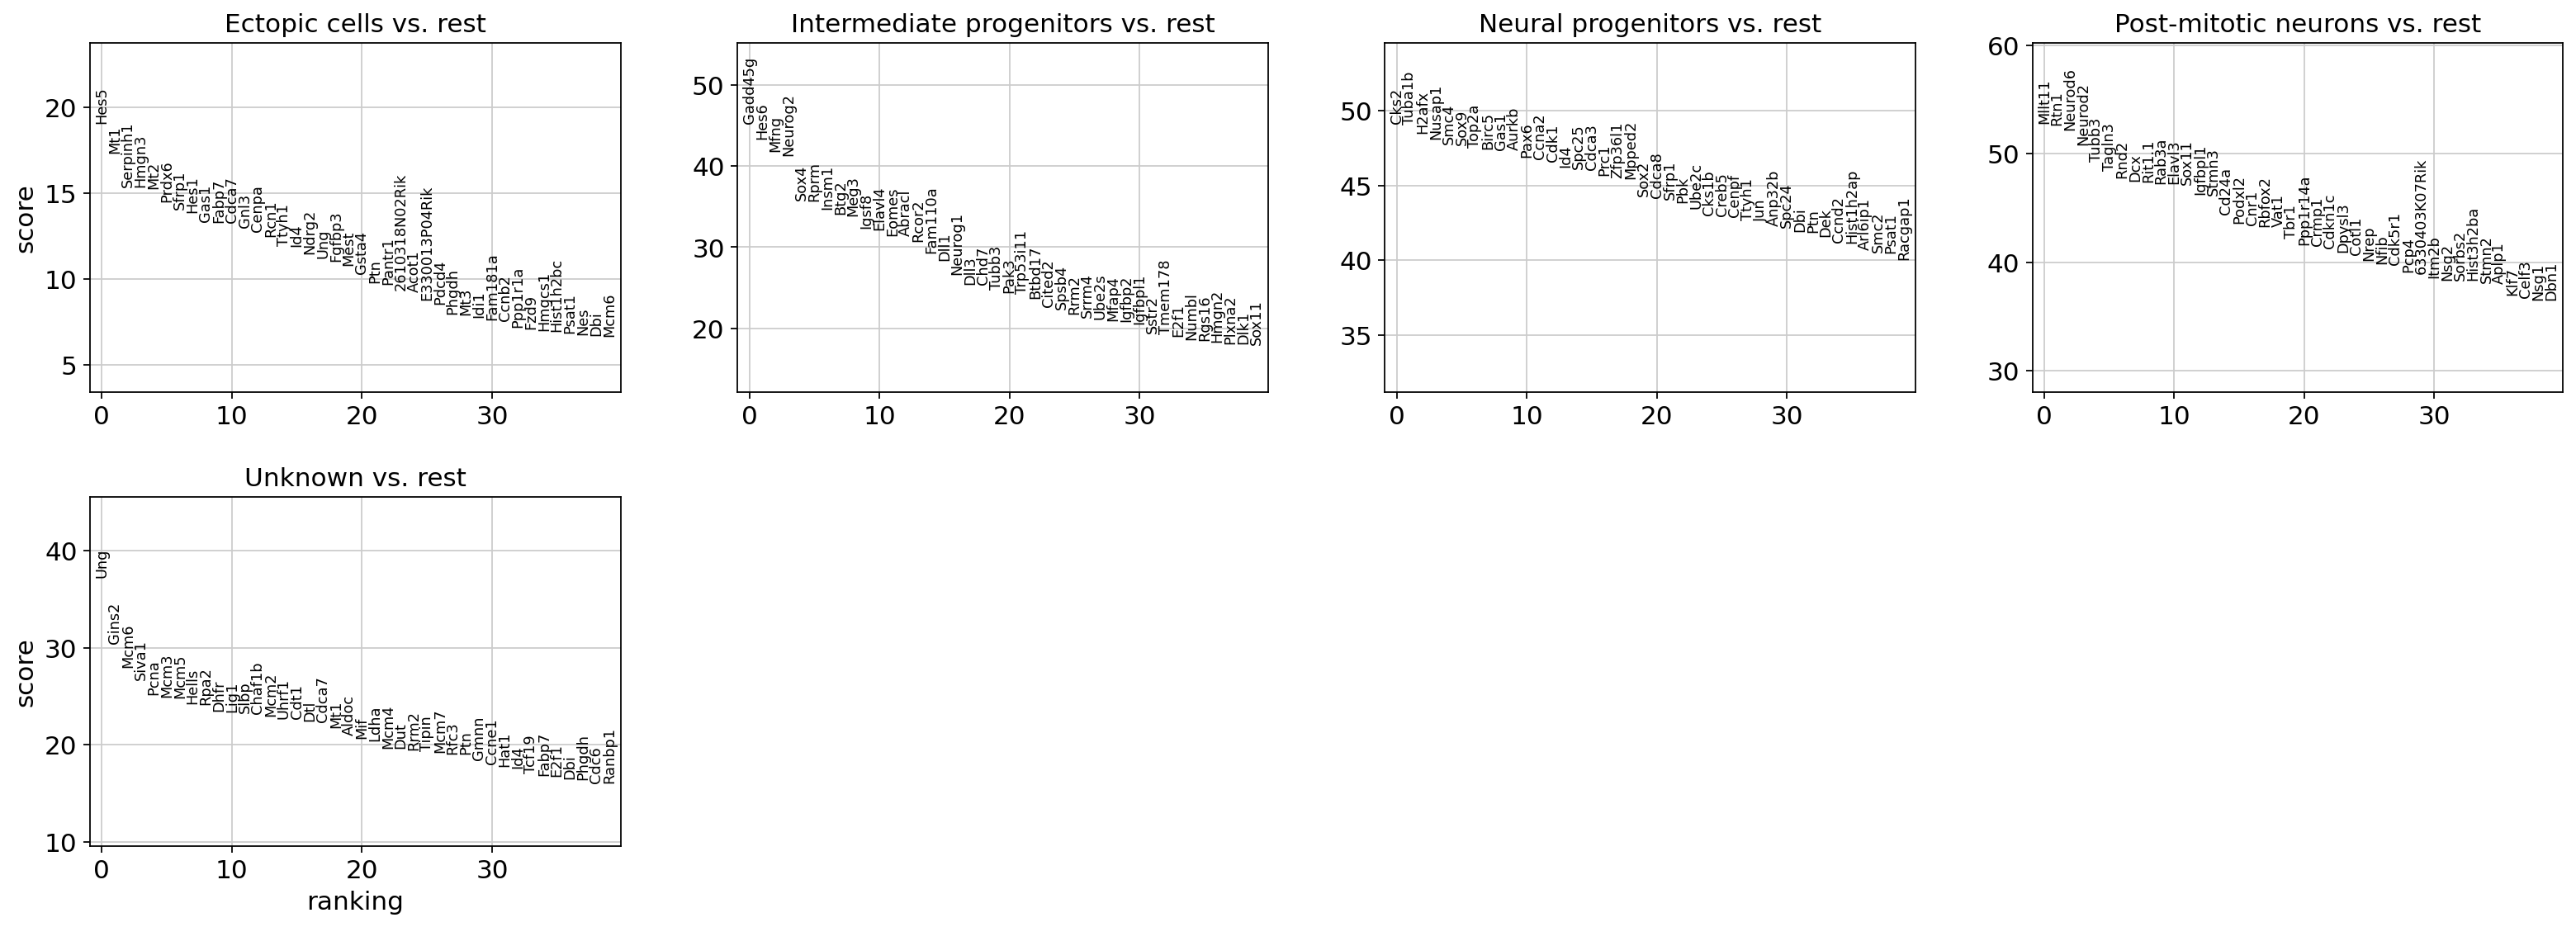

Ectopic cells Intermediate progenitors Neural progenitors  \
0           Hes5                  Gadd45g               Cks2   
1            Mt1                     Hes6             Tuba1b   
2       Serpinh1                     Mfng              H2afx   
3          Hmgn3                  Neurog2             Nusap1   
4            Mt2                     Sox4               Smc4   
5          Prdx6                     Rprm               Sox9   
6          Sfrp1                    Insm1              Top2a   
7           Hes1                     Btg2              Birc5   
8           Gas1                     Meg3               Gas1   
9          Fabp7                    Igsf8              Aurkb   
10         Cdca7                   Elavl4               Pax6   
11          Gnl3                    Eomes              Ccna2   
12         Cenpa                   Abracl               Cdk1   
13          Rcn1                    Rcor2                Id4   
14         Ttyh1                  Fam110a              Spc25   
15           Id4                     Dll1              Cdca3   
16         Ndrg2                  Neurog1               Prc1   
17           Ung                     Dll3            Zfp36l1   
18        Fgfbp3                     Chd7             Mpped2   
19          Mest                    Tubb3               Sox2   

   Post-mitotic neurons Unknown  
0                Mllt11     Ung  
1                  Rtn1   Gins2  
2               Neurod6    Mcm6  
3               Neurod2   Siva1  
4                 Tubb3    Pcna  
5                Tagln3    Mcm3  
6                  Rnd2    Mcm5  
7                   Dcx   Hells  
8                Rit1.1    Rpa2  
9                 Rab3a    Dhfr  
10               Elavl3    Lig1  
11                Sox11    Slbp  
12              Igfbpl1  Chaf1b  
13                Stmn3    Mcm2  
14                Cd24a   Uhrf1  
15               Podxl2    Cdt1  
16                 Cnr1     Dtl  
17               Rbfox2   Cdca7  
18                 Vat1     Mt1  
19                 Tbr1   Aldoc

In [20]:
# wilcoxon uses Wilcoxon rank-sum to rank the genes
sc.tl.rank_genes_groups(adata, 'leiden_annotations', method='wilcoxon', use_raw=True) # 100 genes by default
sc.pl.rank_genes_groups(adata, n_genes=40, sharey=False, use_raw=True)

top_ranked_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
top_ranked_genes.head(20)

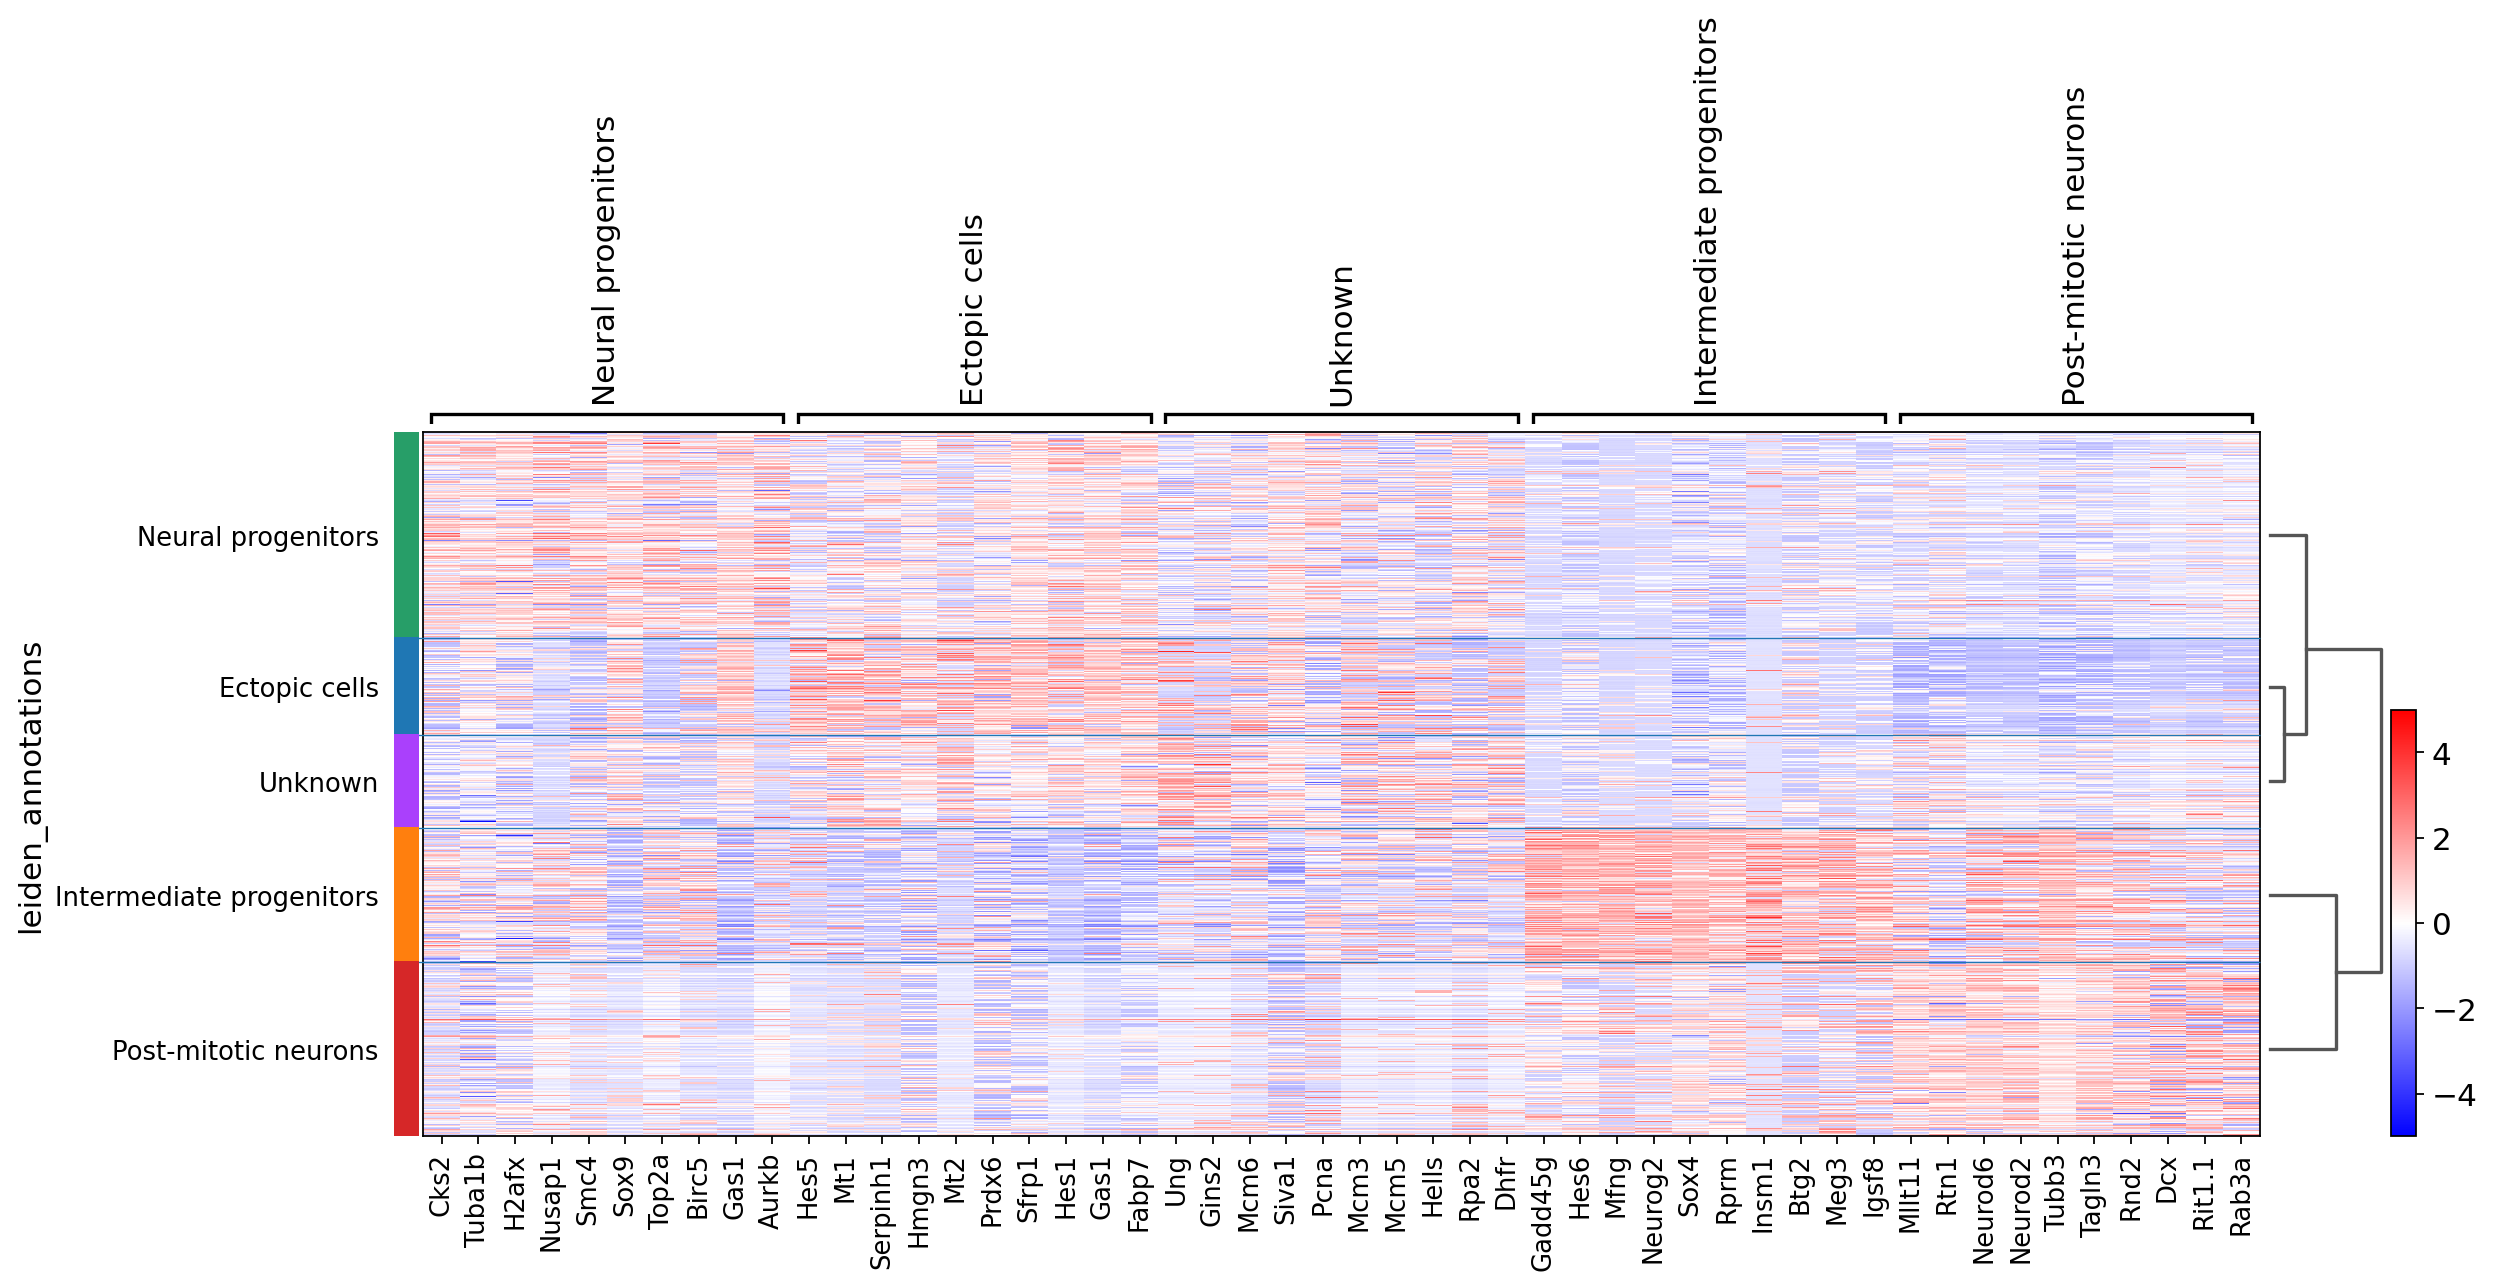

In [21]:
# Heatmap shows the top 5 differentiably expressed genes for each cluster
sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, use_raw=False, swap_axes=False,
                                vmin=-5, vmax=5, cmap='bwr', show_gene_labels=True)

<AxesSubplot:>

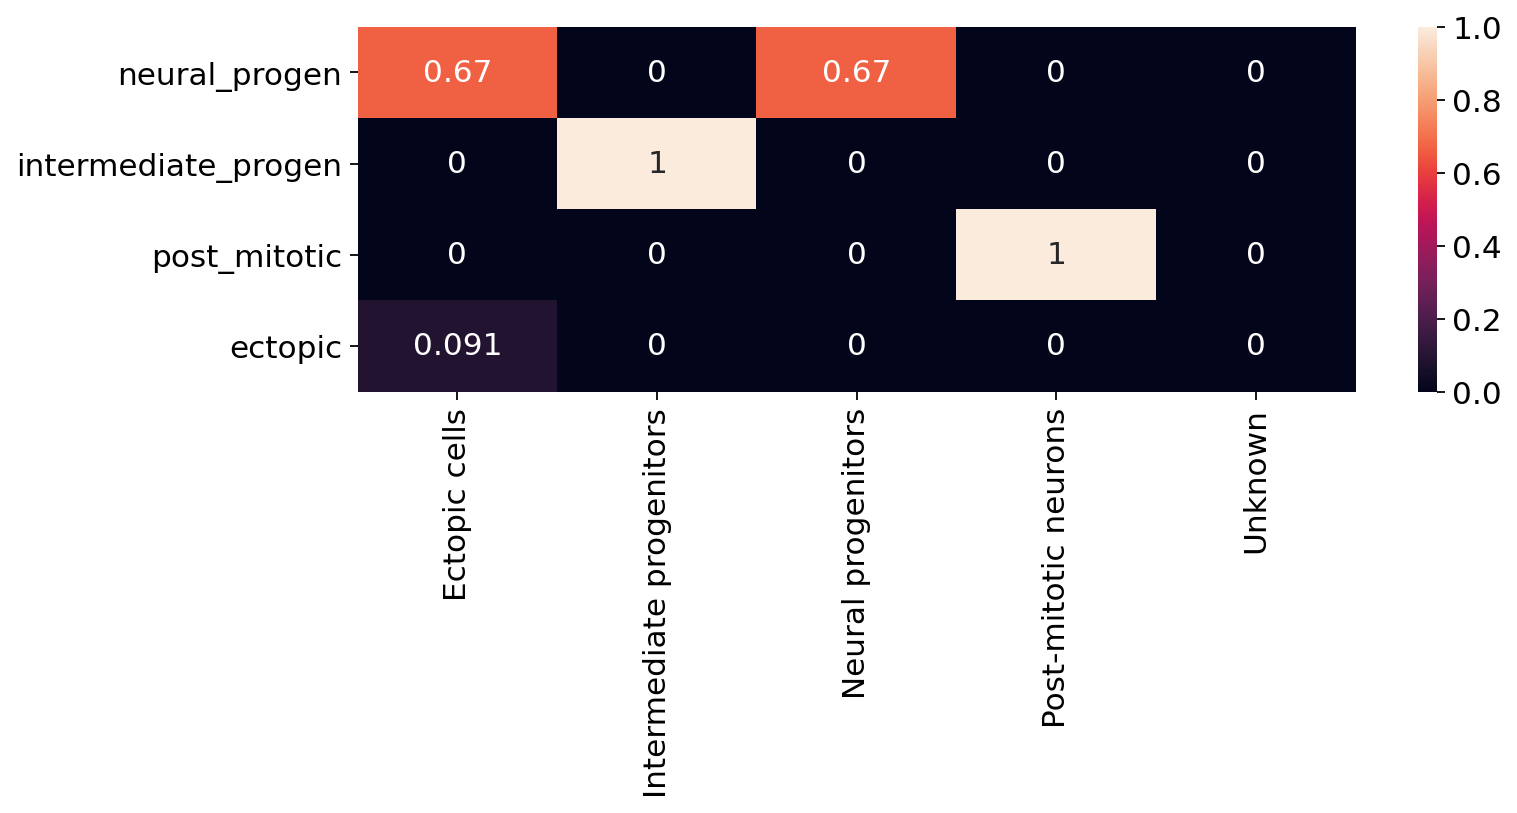

In [22]:
fig, ax = plt.subplots(figsize=(10,3))
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, reference_markers=marker_genes,
                                                 key='rank_genes_groups', normalize='reference')

sb.heatmap(cell_annotation_norm, cbar=True, annot=True)

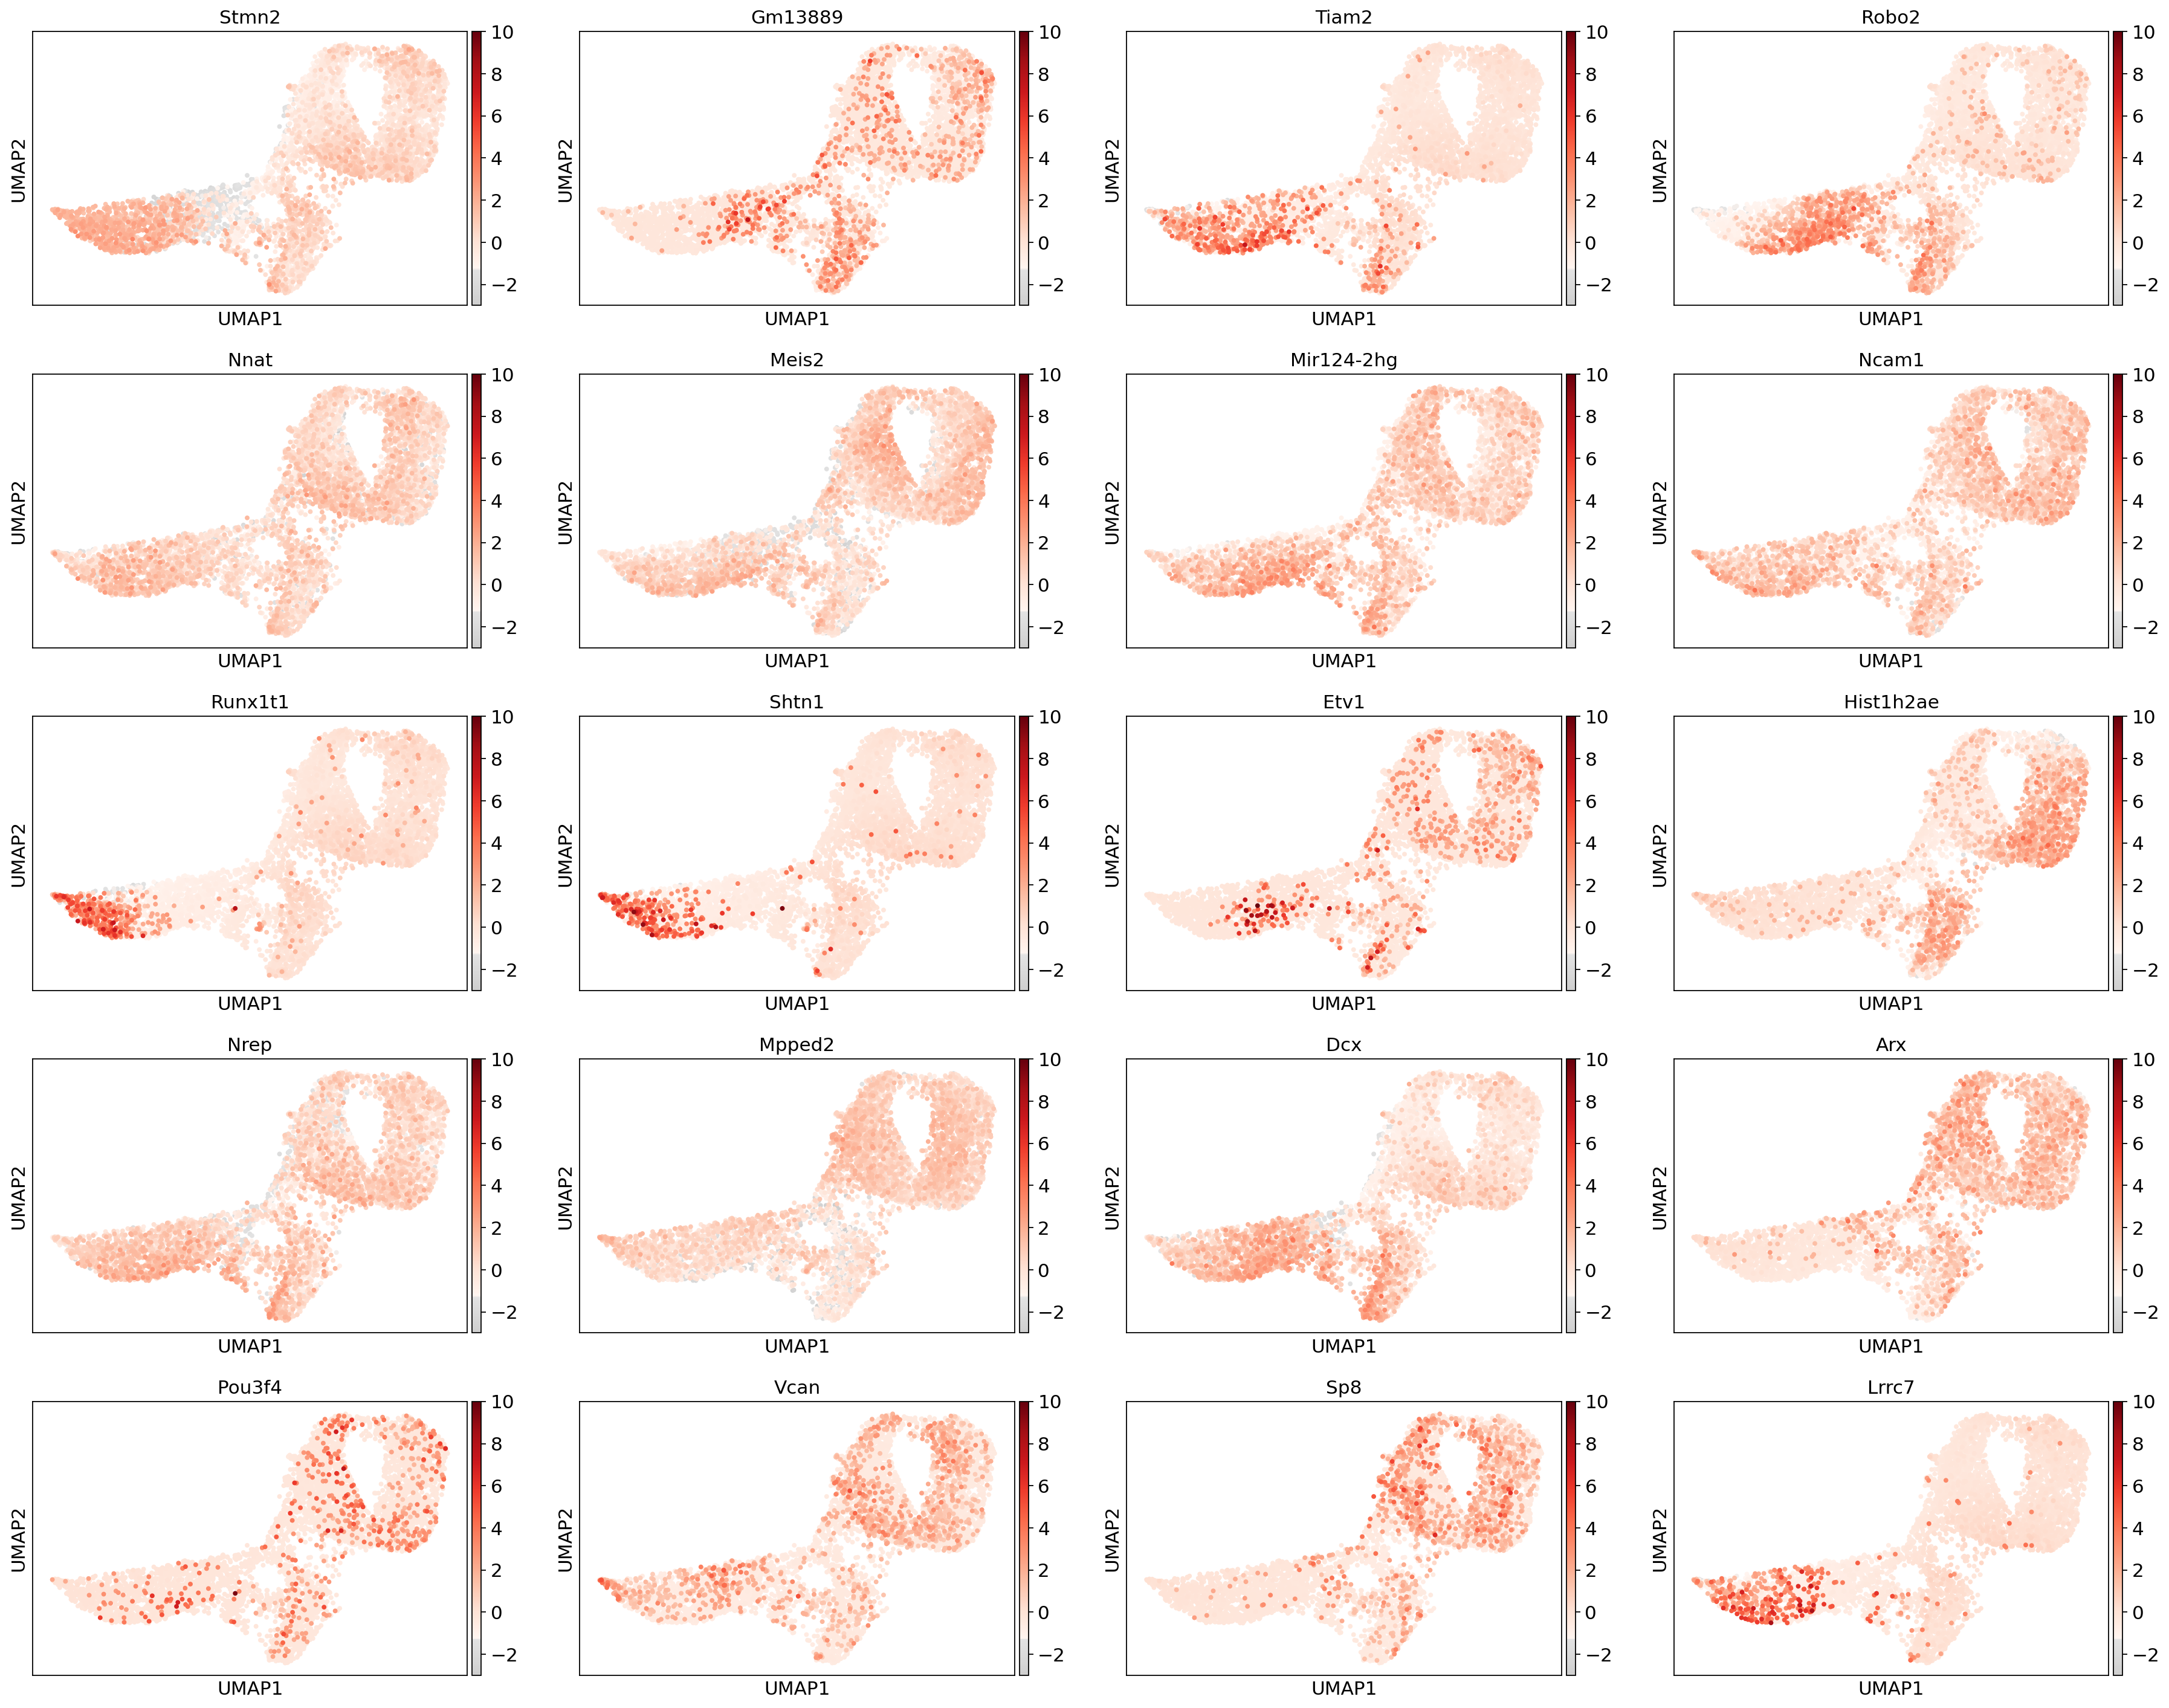

In [39]:
# Visualise the top 20 marker genes for ectopic cells
# For E13, use the marker genes that were found from E14

if dataset == 'E13_hom':
    E14 = sc.read('../ann_data/exp_04/E14_hom_norm_variable_genes.h5ad')
    E14_ectopic = pd.DataFrame(E14.uns['rank_genes_groups']['names'])['Ectopic cells']
    var_names = set(adata.var_names)
    columns = set(adata.obs.columns)
    gene_names = var_names.union(columns)
    ectopic_genes = list(gene_names.intersection(E14_ectopic))[:20]
    vmin = -3
    vmax = 10
else:
    ectopic_genes = top_ranked_genes['Ectopic cells'].head(20)
    vmin = -2
    vmax = 5
    

sc.pl.umap(adata, color=ectopic_genes, cmap=mymap, use_raw=False, size=50, vmin=vmin, vmax=vmax)

## Update h5ad file

In [ ]:
# adata_file = '../ann_data/exp_04/' + dataset + '_norm_variable_genes.h5ad'
# adata.write(adata_file)
# print('{} file updated'.format(adata_file))